In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url1 = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv'
url2 = 'https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv'
municipio = pd.read_csv(url1)
estado = pd.read_csv(url2)

In [3]:
display(municipio)
display(estado)

,date,country,state,city,ibgeID,deaths,newCases,totalCases
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,1,1
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1
2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,1
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1
4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,1
...,...,...,...,...,...,...,...,...
11278,2020-04-11,Brazil,GO,Águas Lindas de Goiás/GO,5200258,0,0,2
11279,2020-04-11,Brazil,SC,Águas Mornas/SC,4200606,0,0,1
11280,2020-04-11,Brazil,SP,Águas de Lindóia/SP,3500501,1,0,1
11281,2020-04-11,Brazil,SP,Águas de São Pedro/SP,3500600,0,0,1


,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS
0,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0
2,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1
4,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
849,2020-04-11,Brazil,SC,TOTAL,3,21,15,732,21,732
850,2020-04-11,Brazil,SE,TOTAL,0,4,0,42,4,42
851,2020-04-11,Brazil,SP,TOTAL,20,560,203,8419,560,8419
852,2020-04-11,Brazil,TO,TOTAL,0,0,0,23,0,23


### Após carregar os 2 datasets, um contém apenas a estatística por Estados Brasileiros e o outro possui as estatísticas mais detalhadas sobre os muncípios, então, resolvo cruzar as informações com a finalidade de comparar o caso total de COVID19 por um Estado, sua capital e alguma outra cidade referente a este Estado.

In [4]:
municipio = municipio[municipio.city.str.contains('Juiz de Fora/MG|Belo Horizonte/MG')]
mg = estado[estado.state.str.contains('MG')]

In [5]:
mg.set_index('date',inplace=True)
municipio.set_index('date',inplace=True)
data = pd.concat([mg, municipio], join="inner")
data.reset_index(inplace=True)
data.city = [x.strip('/MG') for x in data.city]
data.city = [x.replace('TOTAL','MG') for x in data.city]
data

,date,country,state,city,deaths,newCases,totalCases
0,2020-03-08,Brazil,MG,MG,0,1,1
1,2020-03-09,Brazil,MG,MG,0,0,1
2,2020-03-10,Brazil,MG,MG,0,0,1
3,2020-03-11,Brazil,MG,MG,0,0,1
4,2020-03-12,Brazil,MG,MG,0,1,2
...,...,...,...,...,...,...,...
86,2020-04-09,Brazil,MG,Juiz de Fora,1,5,51
87,2020-04-10,Brazil,MG,Belo Horizonte,6,20,330
88,2020-04-10,Brazil,MG,Juiz de Fora,1,2,53
89,2020-04-11,Brazil,MG,Belo Horizonte,6,8,338


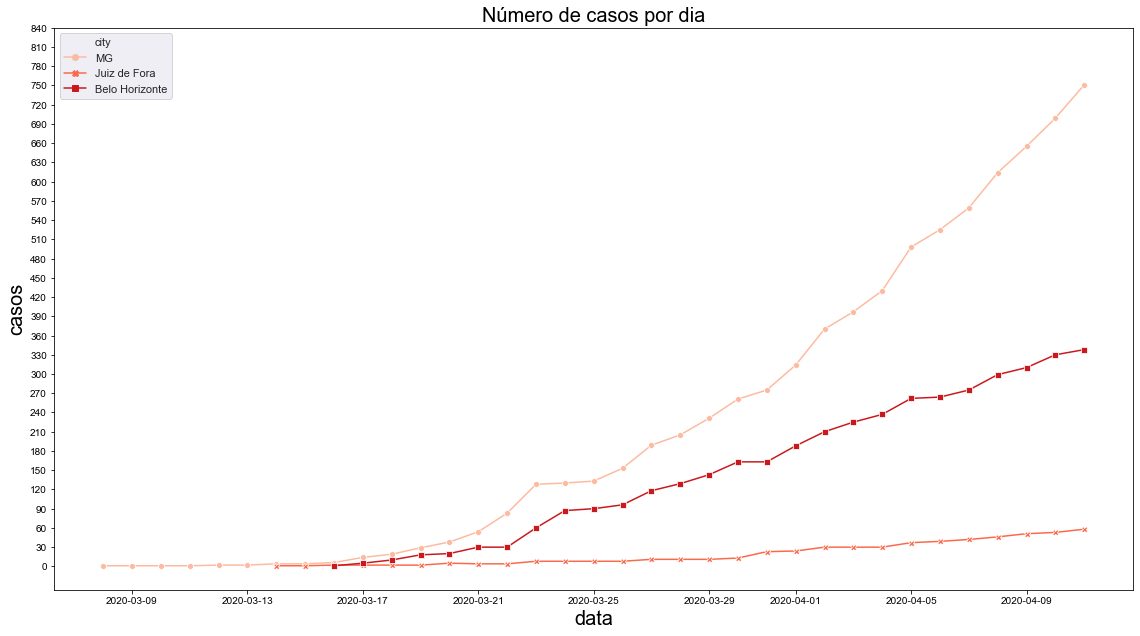

In [6]:
data.date = pd.to_datetime(data.date)
fig, ax = plt.subplots(figsize=(16,9))
sns.set()
ax = sns.lineplot(x='date', y='totalCases', hue='city',data=data, markers=True, dashes=False, style="city", palette="Reds", legend="full")
plt.xlabel('data', size=20)
plt.ylabel('casos', size=20)
plt.title('Número de casos por dia', size=20)
plt.yticks(np.arange(0, max(data.totalCases)+100, 30))
plt.tight_layout()
plt.savefig('jfbh.png')